In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')

In [5]:
df = pd.read_csv(r"C:\Users\user\Downloads\diamonds.csv", index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [7]:
df.drop(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index, axis=0, inplace=True)
df["price"] = df["price"].astype(float)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data_attributes= ['cut','color','clarity']
for att in data_attributes:
    print(f'{att}:\n--------')
    res = df[att].value_counts()
    print(res)
    print('***********************************')


cut:
--------
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64
***********************************
color:
--------
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64
***********************************
clarity:
--------
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64
***********************************


In [10]:
encoded_columns = {"cut" : {'Ideal':1, 'Premium':2, 'Very Good':3, 'Good':4, 'Fair':5},
                   "color": {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7},
                   "clarity": {'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8}}

df.replace(encoded_columns, inplace=True)
print(df['color'].value_counts())
print(df['cut'].value_counts())
print(df['clarity'].value_counts())

4    11284
2     9797
3     9538
5     8298
1     6774
6     5421
7     2808
Name: color, dtype: int64
1    21548
2    13780
3    12081
4     4902
5     1609
Name: cut, dtype: int64
6    13063
5    12254
7     9185
4     8170
3     5066
2     3654
1     1790
8      738
Name: clarity, dtype: int64


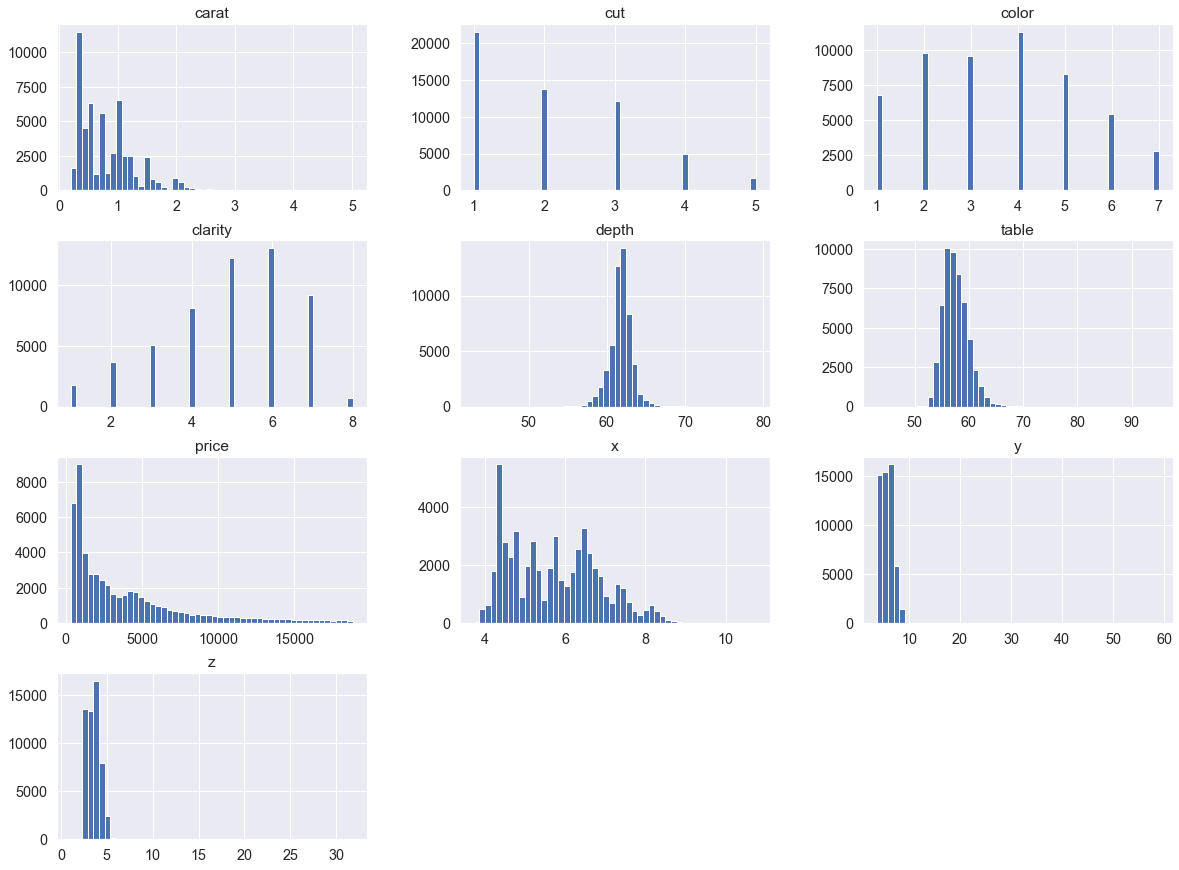

In [11]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

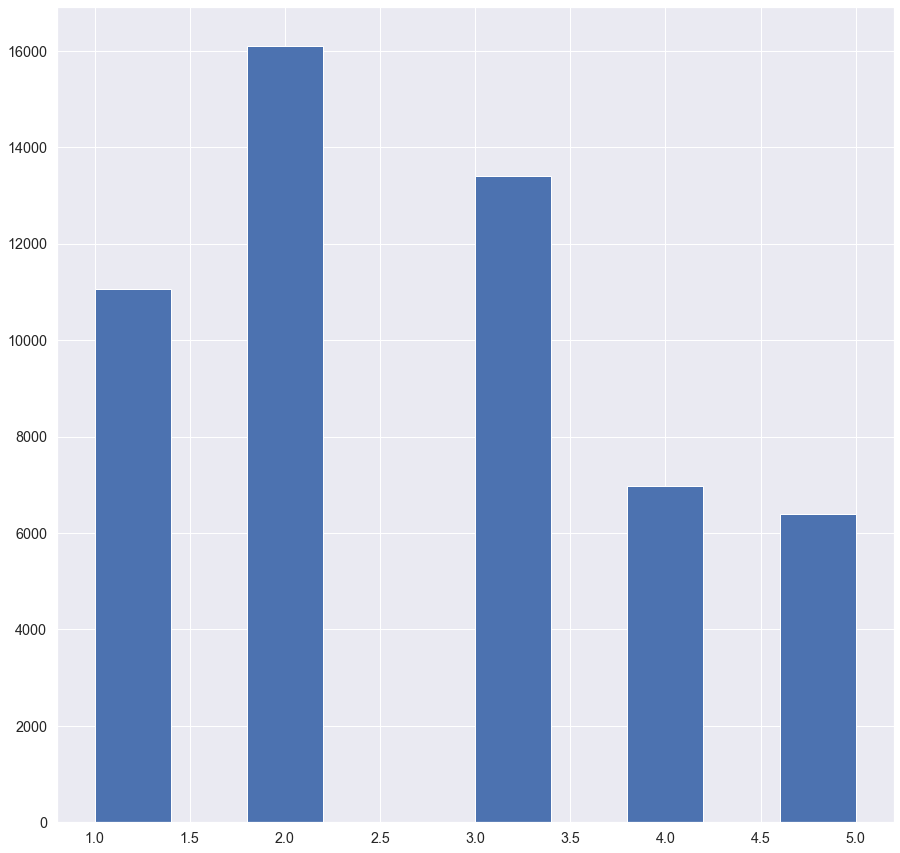

In [12]:
# For example and for better visualising , Divide the diamond carats by 0.4 to limit the number of carat categories
# Round up to have discrete categories
df["carat_cat"] = np.ceil(df["carat"] / 0.35)

# then Merge categories > 5 in 5
df["carat_cat"].where(df["carat_cat"] < 5, 5.0, inplace = True)
df["carat_cat"].hist()
plt.show()

In [13]:
# and to check :
df["carat_cat"].value_counts()

2.0    16104
3.0    13393
1.0    11058
4.0     6964
5.0     6401
Name: carat_cat, dtype: int64

Text(0.5, 1.0, 'clarity')

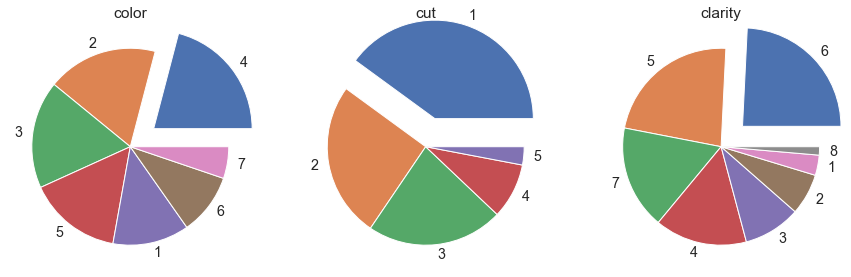

In [49]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
myExplode = [0.3, 0, 0, 0, 0,0,0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['color'].value_counts().values), labels=list(df['color'].value_counts().index) , explode= myExplode)
plt.title('color')
 

plt.subplot(1,3,2)
myExplode = [0.3, 0, 0, 0, 0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['cut'].value_counts().values), labels=list(df['cut'].value_counts().index) , explode= myExplode)
plt.title('cut')

plt.subplot(1,3,3)
myExplode = [0.3, 0, 0, 0, 0,0,0,0]
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.3, style='dark')
plt.pie(list(df['clarity'].value_counts().values), labels=list(df['clarity'].value_counts().index) , explode= myExplode)
plt.title('clarity')

Text(0.5, 1.0, 'clarity')

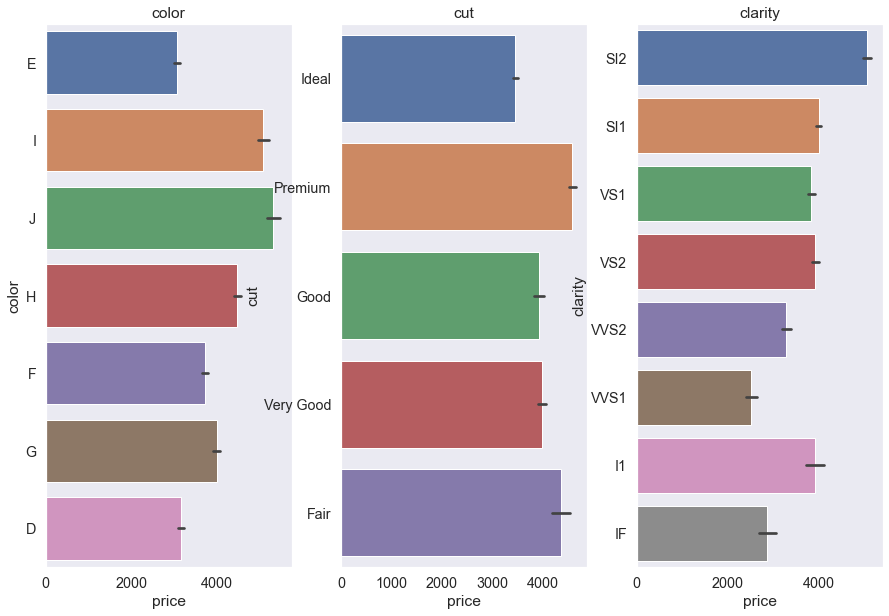

In [9]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
#sns.barplot(x=df['color'].value_counts())
sns.barplot(data=df, y='color', x='price')
plt.title('color')
 

plt.subplot(1,3,2)
sns.barplot(data=df, y='cut', x='price')
plt.title('cut')

plt.subplot(1,3,3)
sns.barplot(data=df, y='clarity', x='price')
plt.title('clarity')

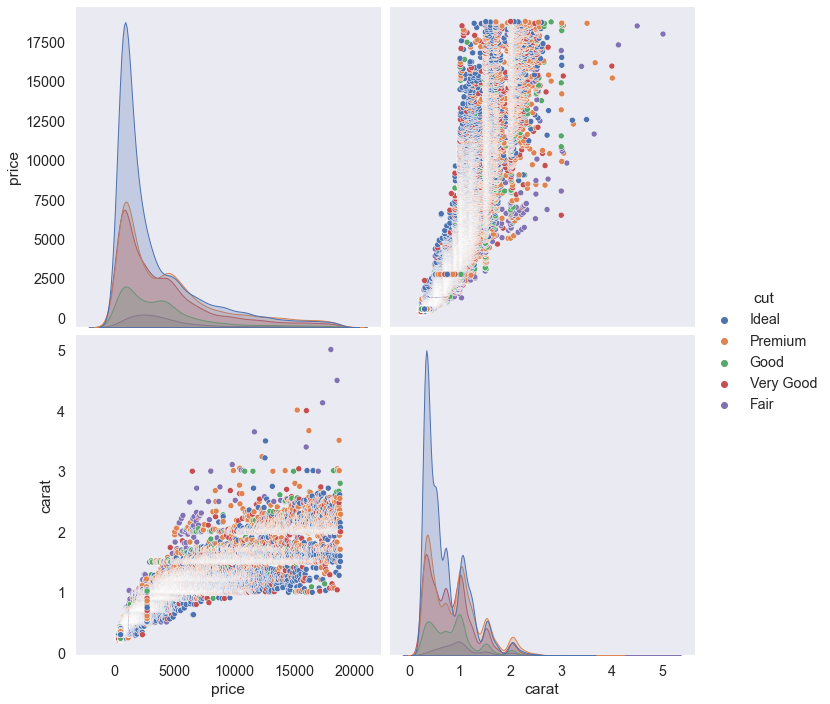

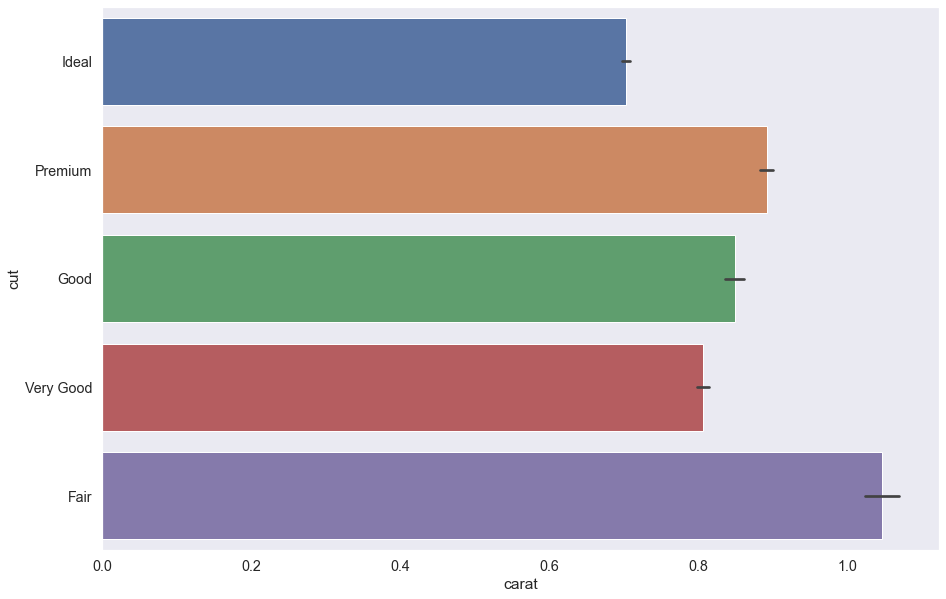

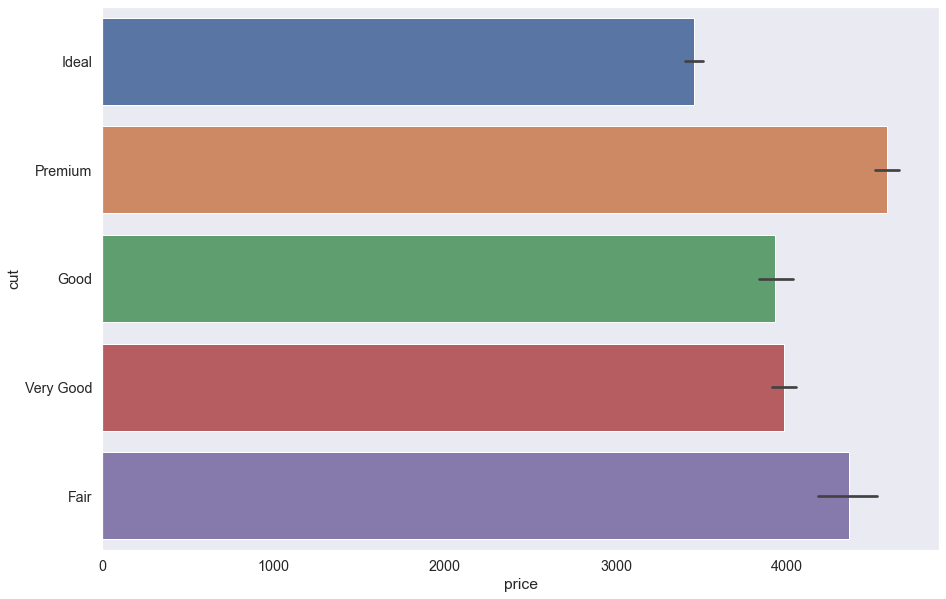

In [13]:
sns.pairplot(df[["price", "carat", "cut"]], hue = "cut", height = 5)
plt.show()
sns.barplot(x = "carat", y = "cut", data = df)
plt.show()
sns.barplot(x = "price", y = "cut", data = df)
plt.show()

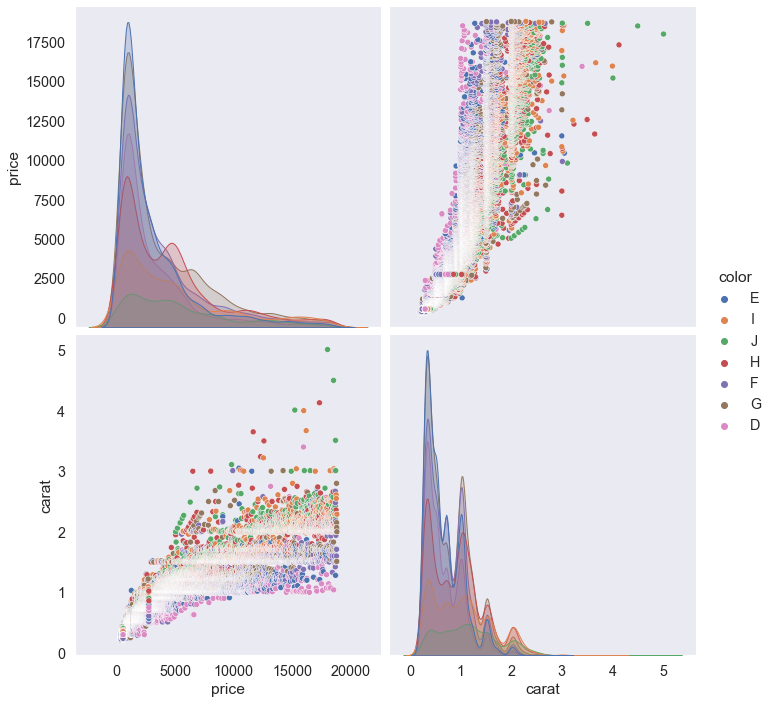

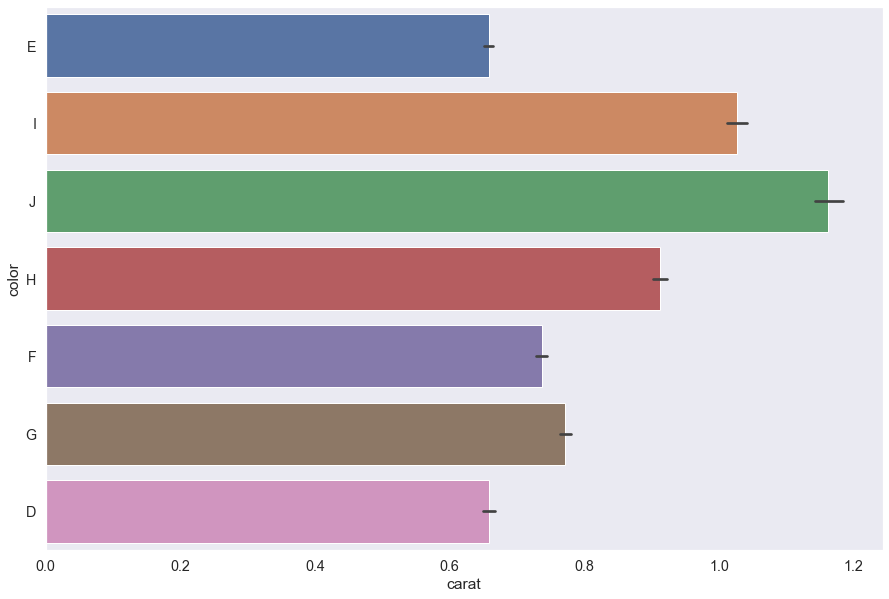

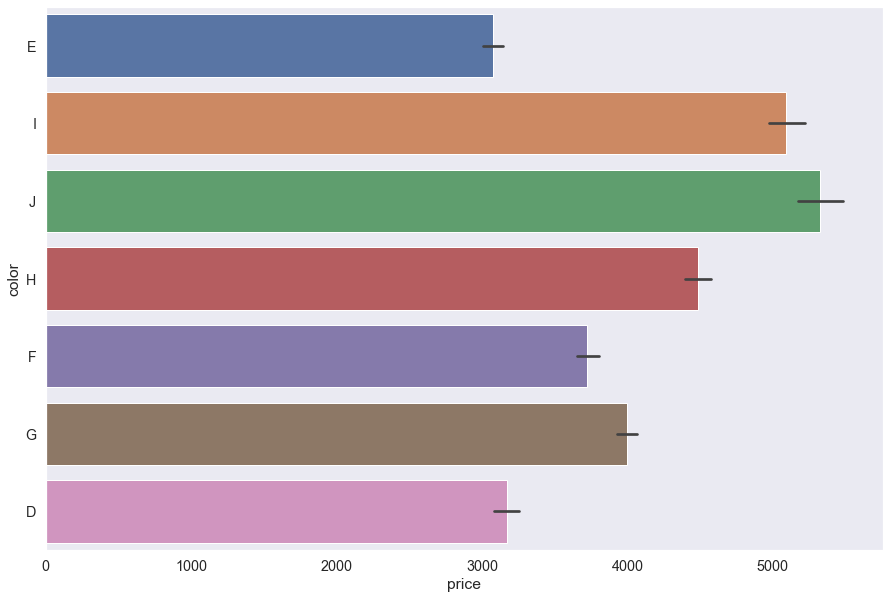

In [11]:
sns.pairplot(df[["price", "carat", "color"]], hue = "color", height = 5)
plt.show()
sns.barplot(x = "carat", y = "color", data = df)
plt.show()
sns.barplot(x = "price", y = "color", data = df)
plt.show()

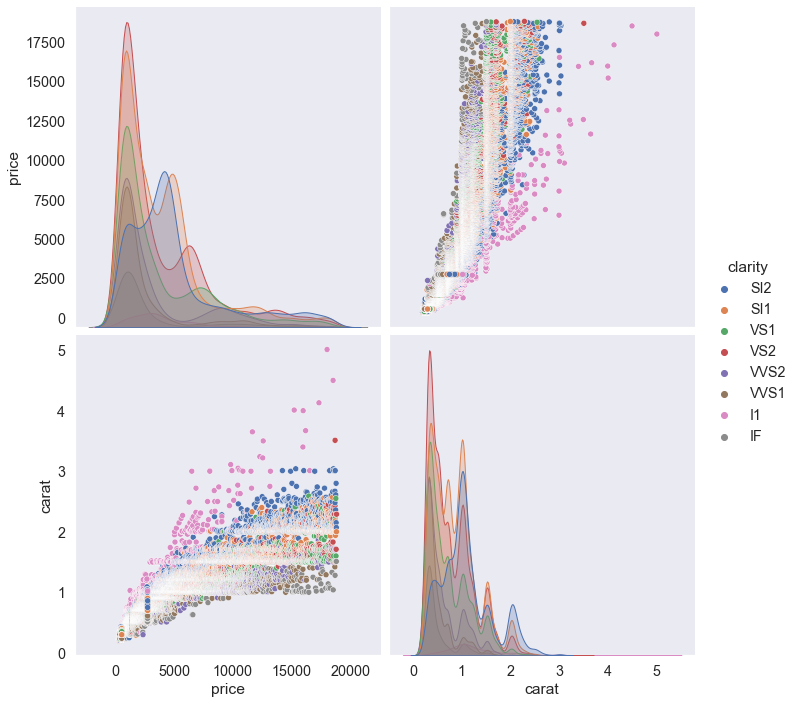

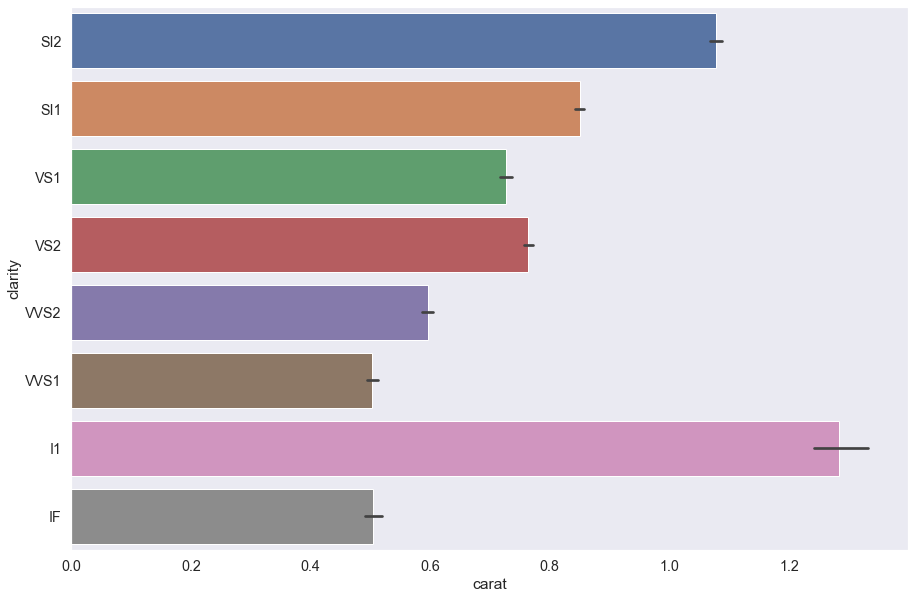

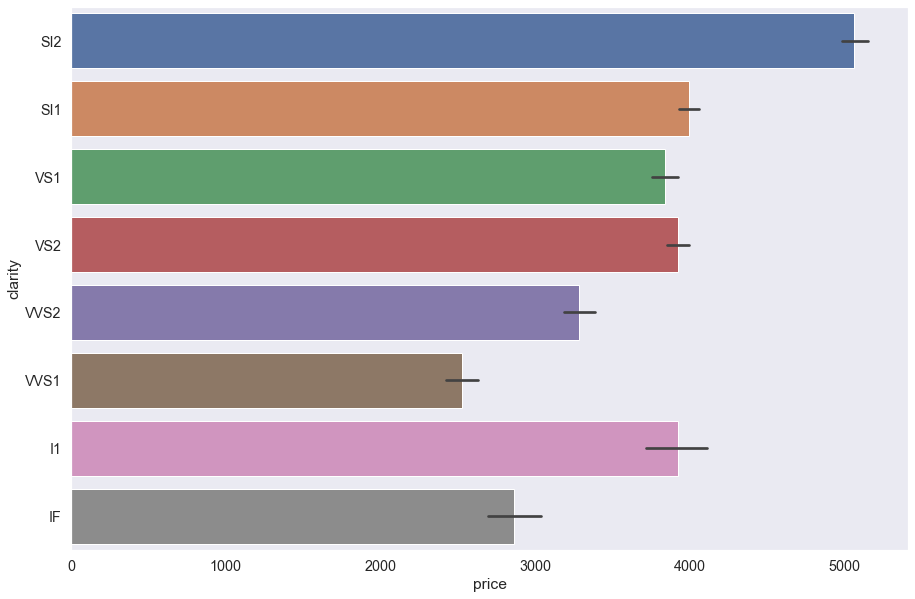

In [12]:
sns.pairplot(df[["price", "carat", "clarity"]], hue = "clarity", height = 5)
plt.show()
sns.barplot(x = "carat", y = "clarity", data = df)
plt.show()
sns.barplot(x = "price", y = "clarity", data = df)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

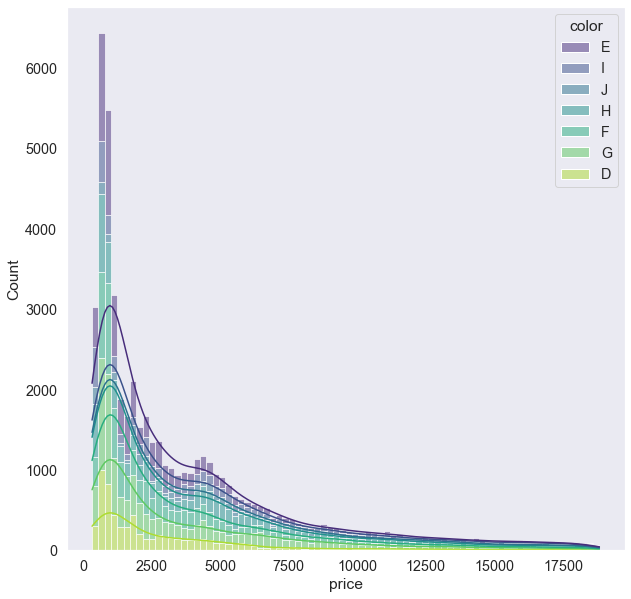

In [14]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='color', multiple="stack")

<AxesSubplot:xlabel='price', ylabel='Count'>

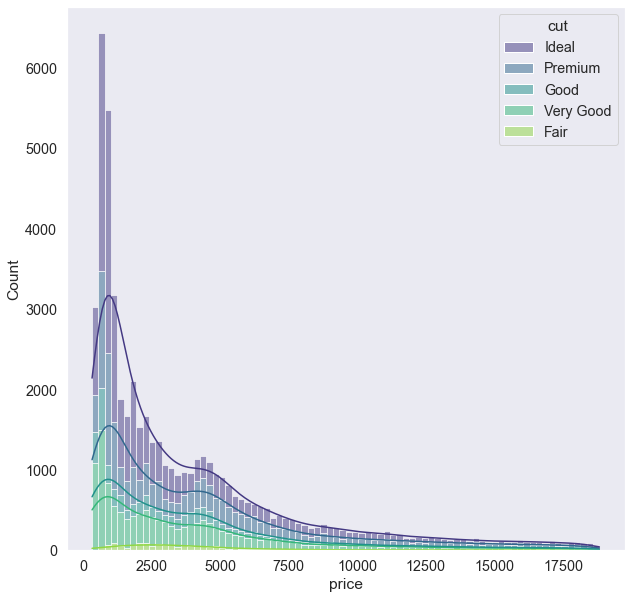

In [15]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='cut', multiple="stack")

<AxesSubplot:xlabel='price', ylabel='Count'>

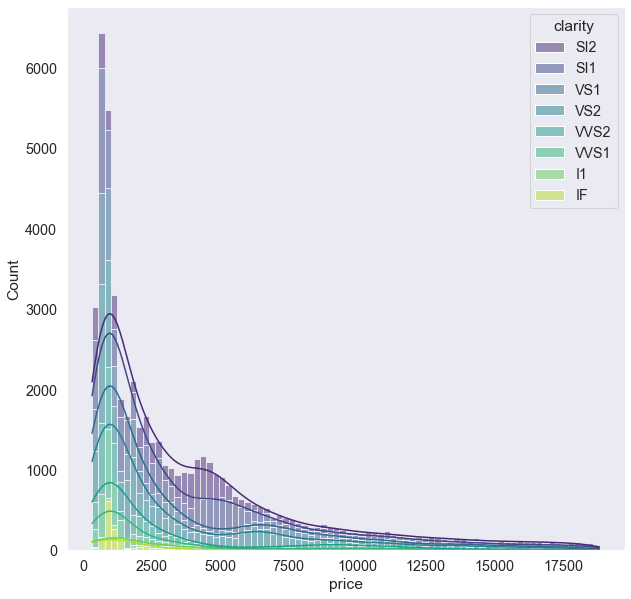

In [16]:
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3, style='dark')
sns.histplot(data=df,x='price', palette='viridis', kde=True ,hue='clarity', multiple="stack")

<AxesSubplot:xlabel='price', ylabel='color'>

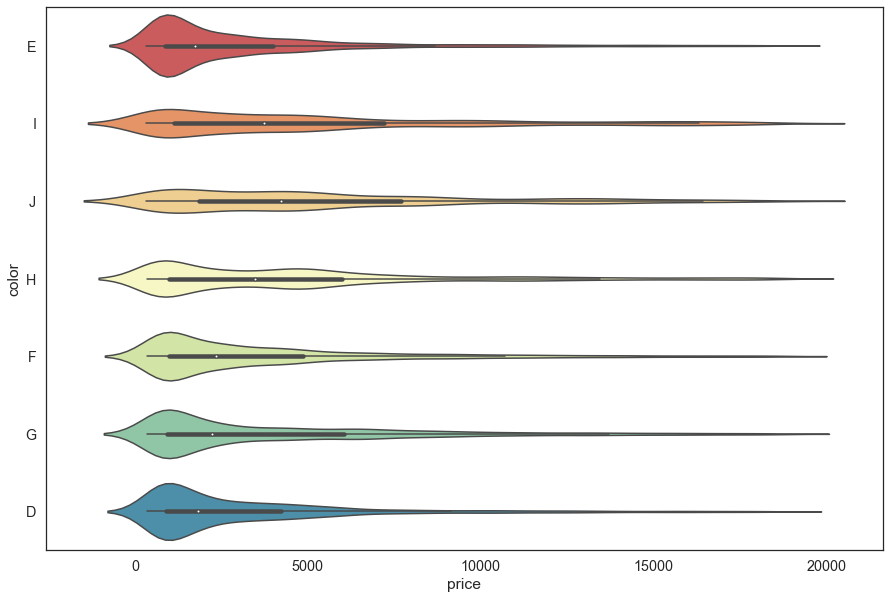

In [17]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.violinplot(data=df, x='price', y='color', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='cut'>

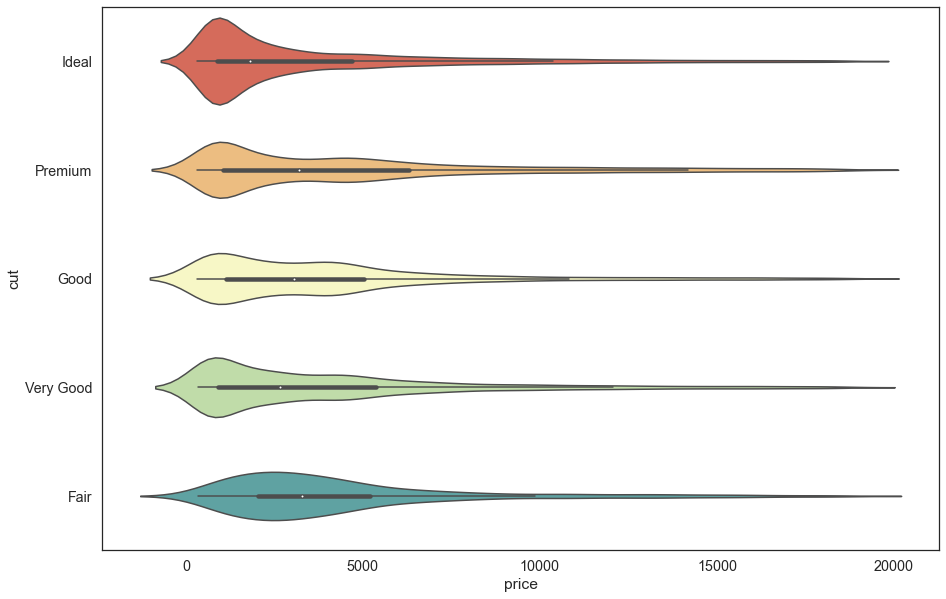

In [18]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.violinplot(data=df, x='price', y='cut', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='clarity'>

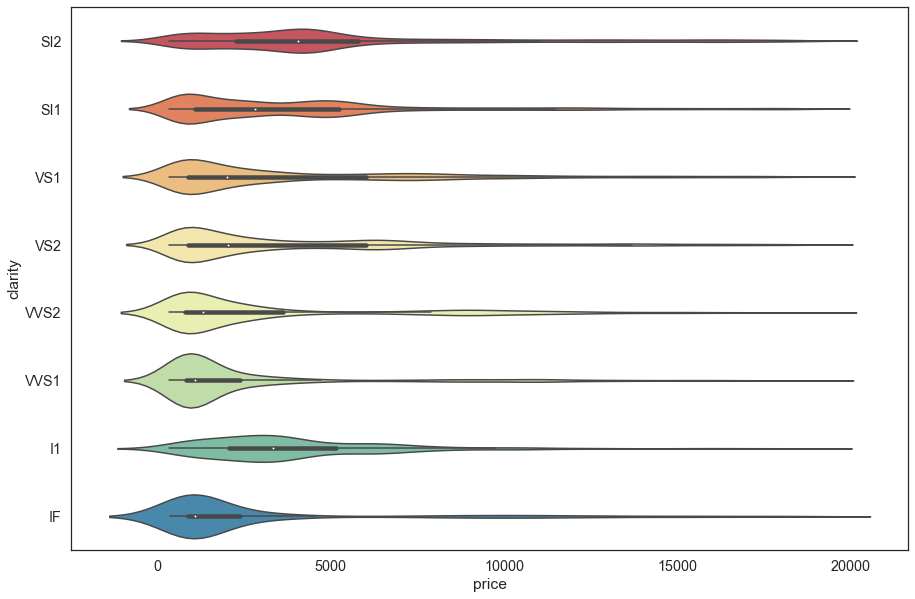

In [19]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.violinplot(data=df, x='price', y='clarity', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='color'>

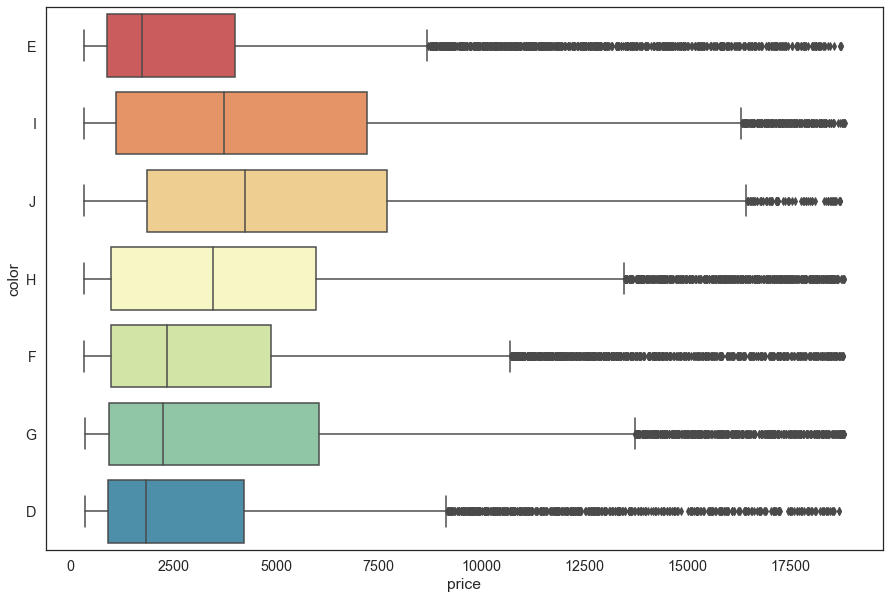

In [20]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.boxplot(data=df, x='price', y='color', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='cut'>

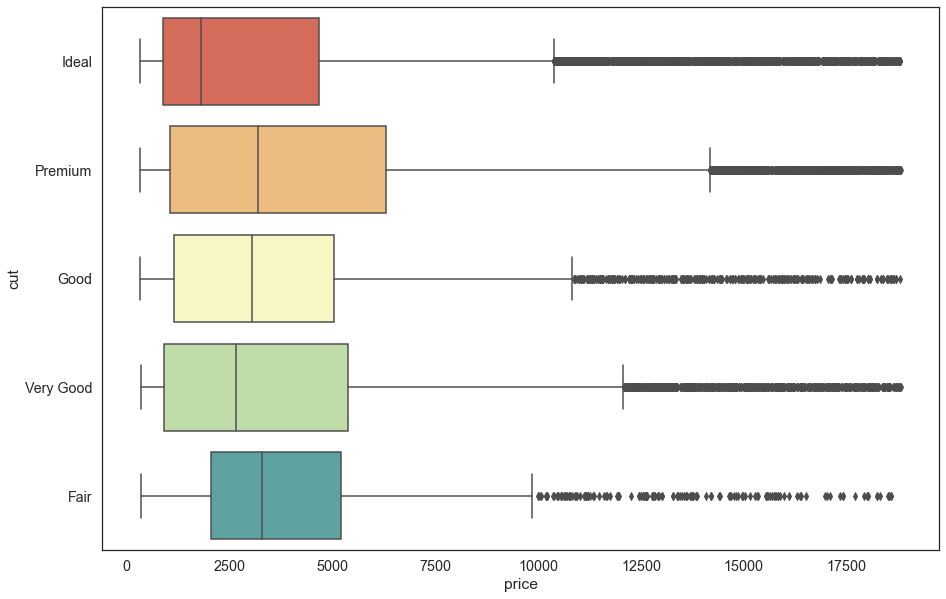

In [21]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.boxplot(data=df, x='price', y='cut', palette='Spectral')

<AxesSubplot:xlabel='price', ylabel='clarity'>

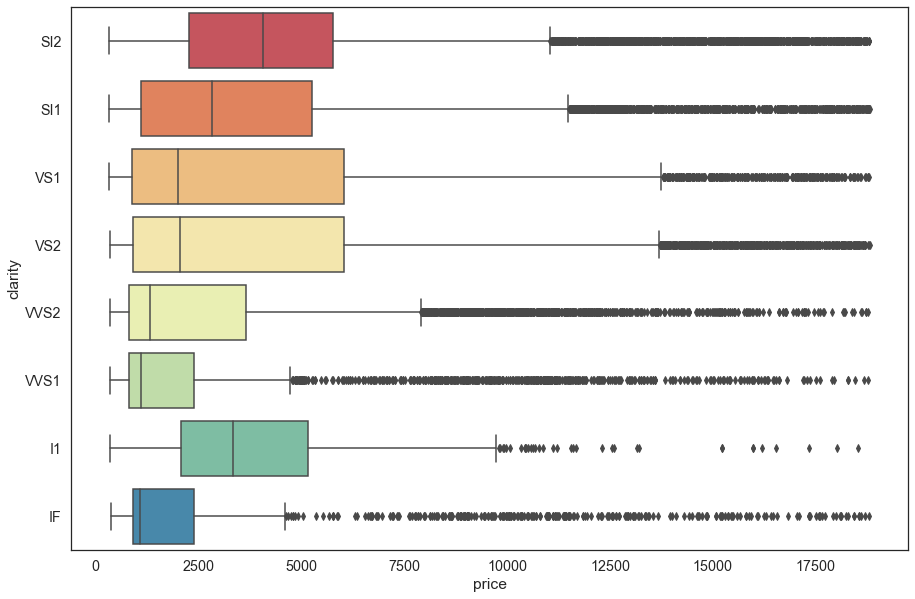

In [22]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='white')
sns.boxplot(data=df, x='price', y='clarity', palette='Spectral')

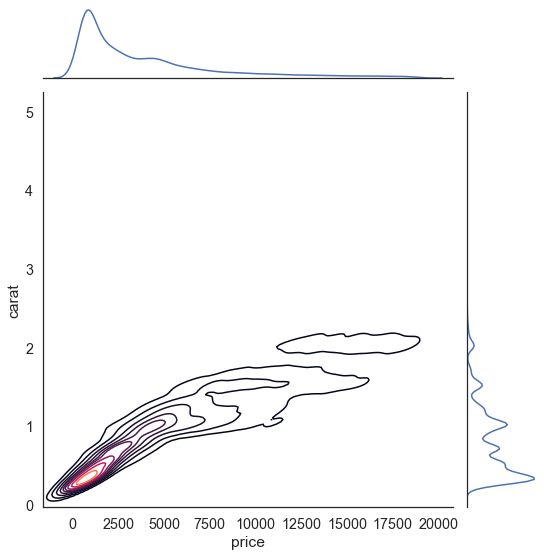

In [23]:
sns.jointplot(x='price', y='carat', data=df, height=8, kind='kde', cmap='rocket')

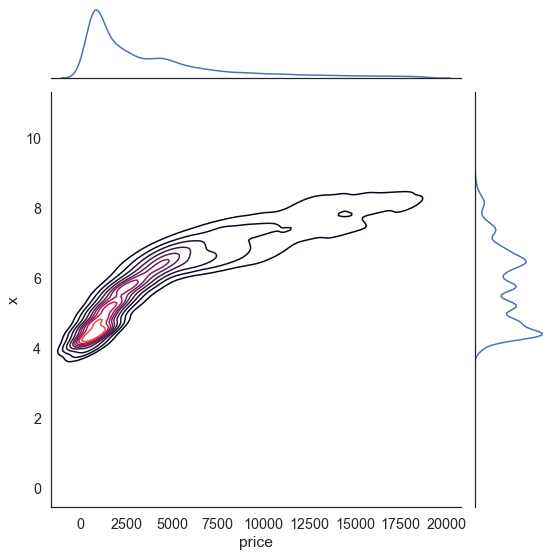

In [24]:
sns.jointplot(x='price', y='x', data=df, height=8, kind='kde', cmap='rocket')

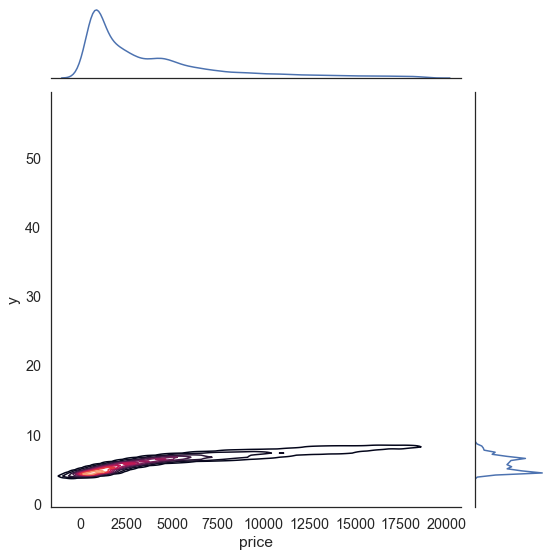

In [25]:
sns.jointplot(x='price', y='y', data=df, height=8, kind='kde', cmap='rocket')

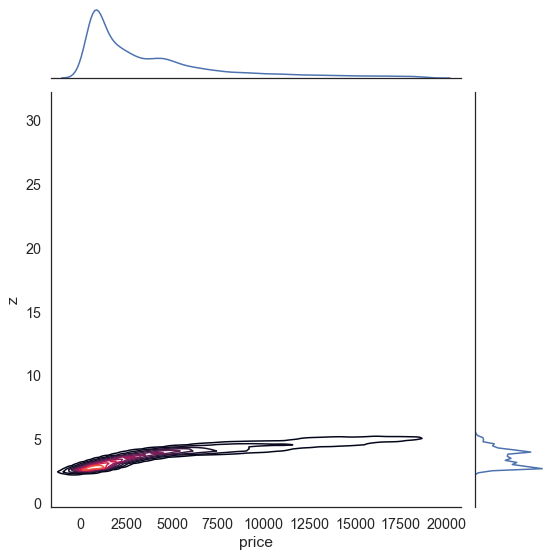

In [29]:
sns.jointplot(x='price', y='z', data=df, height=8, kind='kde', cmap='rocket')

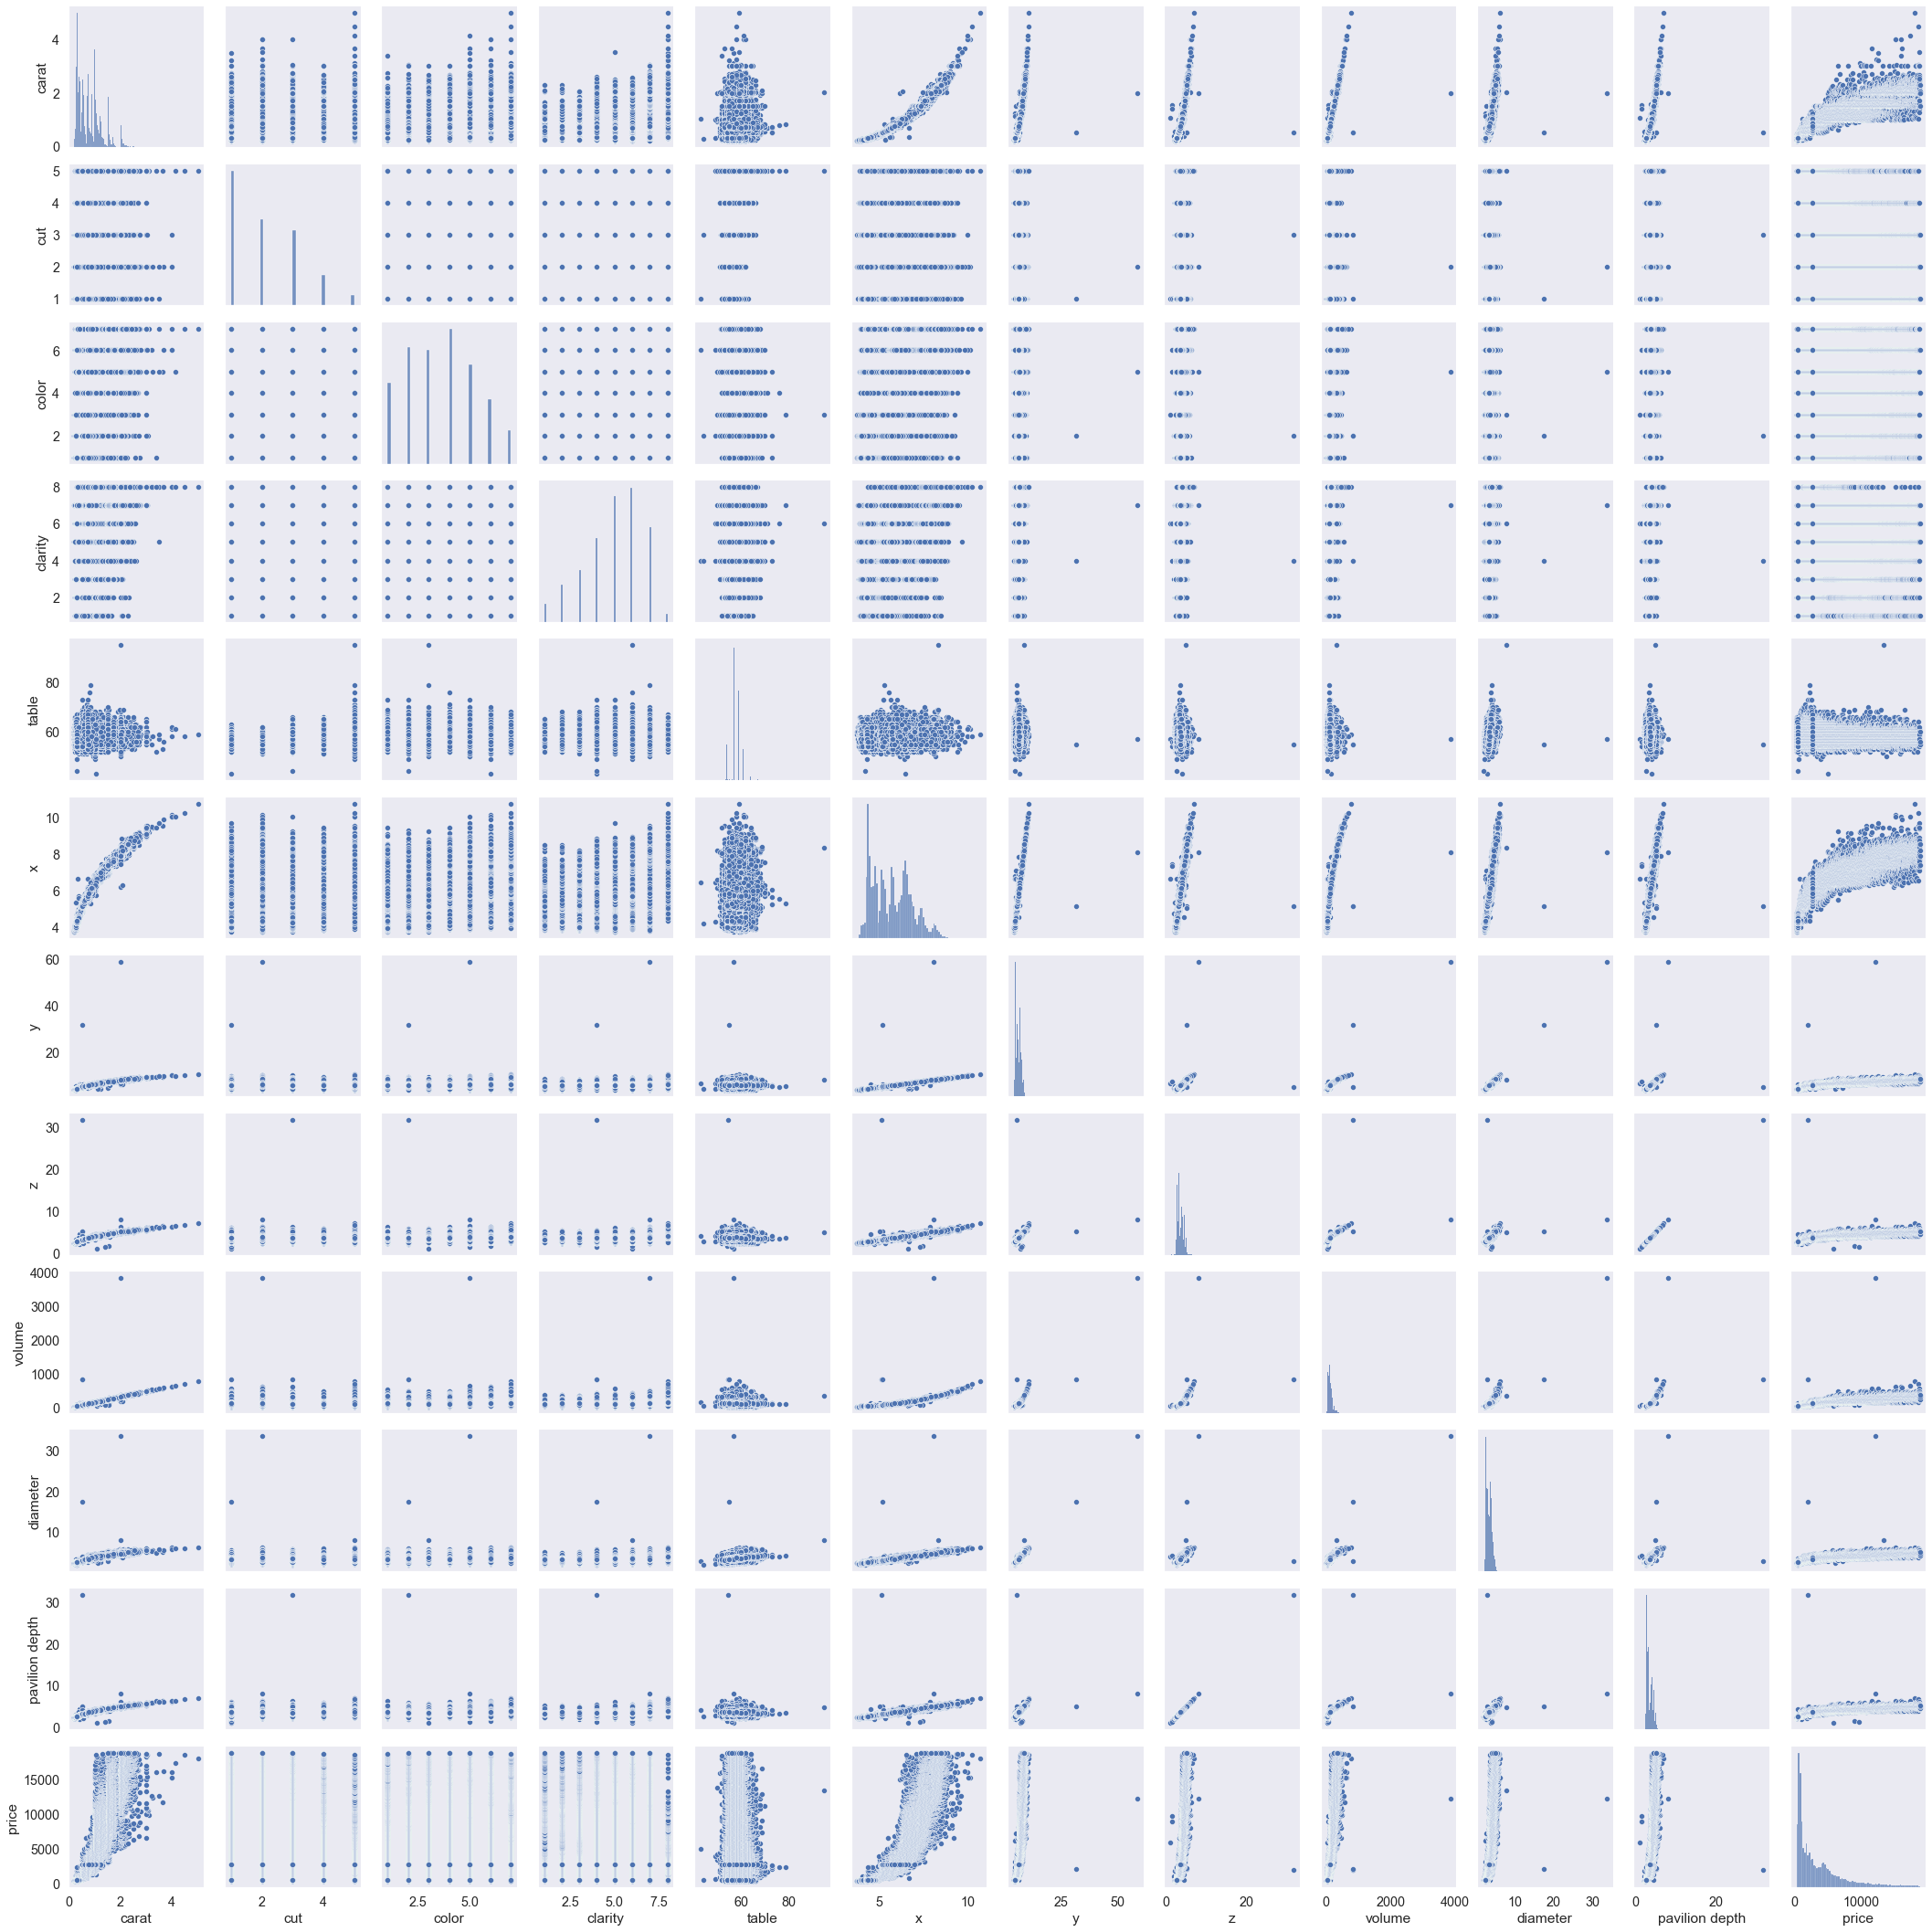

In [48]:
sns.color_palette("flare", as_cmap=True)
sns.pairplot(df)

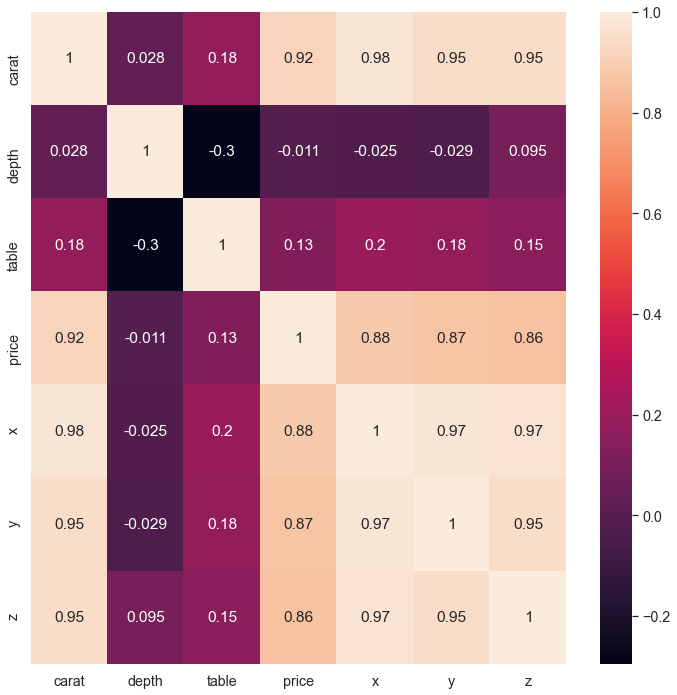

In [28]:
# Create a correlation matrix between every pair of attributes
corr_matrix = df.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

<AxesSubplot:>

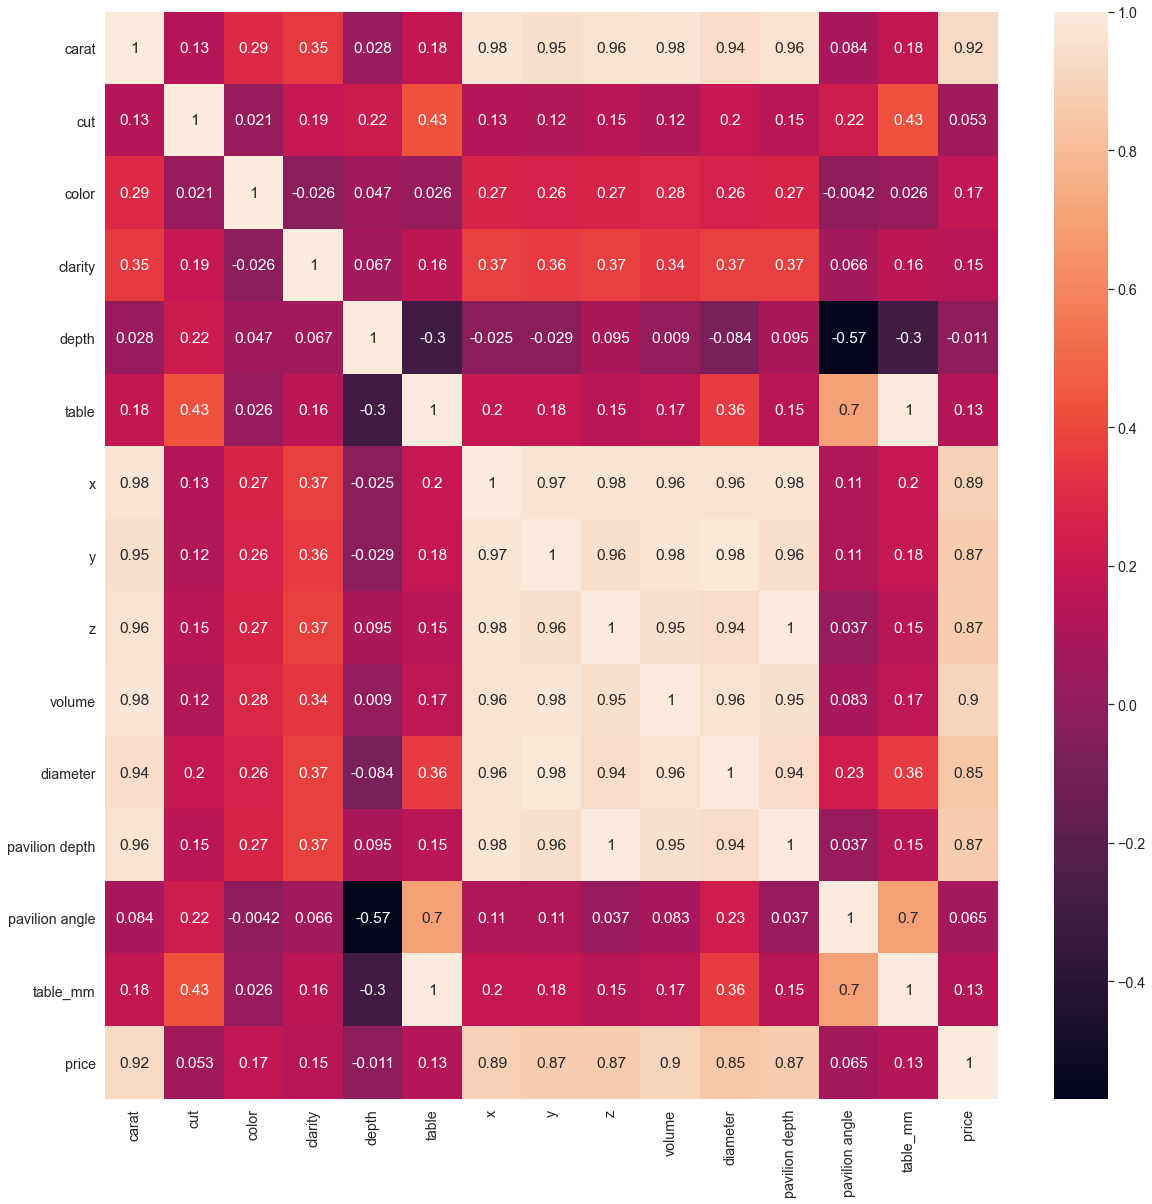

In [20]:
df['volume']=df['x']*df['y']*df['z'] # measured in mm cube
df['table_mm']= df['table']/100
df['diameter']=df['table']*df['y']/100  #df['y']*100/df['table'] 
df['depth']=df['depth']/100
df['pavilion depth']=df['z']-df['depth'] # z= height - pavilion depth in mm
df['pavilion angle']= np.tan(df['diameter']/df['pavilion depth'])  # measured in degree
df = df[['carat','cut','color','clarity','depth','table','x','y','z','volume','diameter','pavilion depth','pavilion angle','table_mm','price']]
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.3, style='dark')
sns.heatmap(data=df.corr(), cmap='rocket', annot=True)

In [21]:
df.drop(['table_mm', 'depth', 'pavilion angle'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 1 to 53940
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53920 non-null  float64
 1   cut             53920 non-null  int64  
 2   color           53920 non-null  int64  
 3   clarity         53920 non-null  int64  
 4   table           53920 non-null  float64
 5   x               53920 non-null  float64
 6   y               53920 non-null  float64
 7   z               53920 non-null  float64
 8   volume          53920 non-null  float64
 9   diameter        53920 non-null  float64
 10  pavilion depth  53920 non-null  float64
 11  price           53920 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 5.3 MB


In [6]:
from sklearn.preprocessing import OneHotEncoder
df_cat_1 = df[['color']]
df_cat_2 = df[['cut']]
df_cat_3 = df[['clarity']]
cat_encoder = OneHotEncoder()
df2_1hot = cat_encoder.fit_transform(df_cat_1)
df2_2hot = cat_encoder.fit_transform(df_cat_2)
df2_3hot = cat_encoder.fit_transform(df_cat_3)
df_encoded_1 = pd.DataFrame(df2_1hot.toarray(), columns='color_'+df["color"].unique())
df_encoded_2 = pd.DataFrame(df2_2hot.toarray(), columns='cut_'+df["cut"].unique())
df_encoded_3 = pd.DataFrame(df2_3hot.toarray(), columns='clarity_'+df["clarity"].unique())
df_encoded = pd.concat([df, df_encoded_1, df_encoded_2, df_encoded_3], axis=1)
df_encoded.drop(['color','cut','clarity'], axis=1, inplace=True)
df_encoded.drop([0,53940])

,carat,depth,table,price,x,y,z,color_E,color_I,color_J,...,cut_Very Good,cut_Fair,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF
1,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,62.7,59.0,2757.0,5.69,5.73,3.58,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [7]:
df2=df
df_2 = pd.get_dummies(df2)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  uint8  
 8   cut_Good       53940 non-null  uint8  
 9   cut_Ideal      53940 non-null  uint8  
 10  cut_Premium    53940 non-null  uint8  
 11  cut_Very Good  53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

In [8]:
df_2.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_2)
df_scaled_1 = pd.DataFrame(data, columns=[df_2.columns])
df_scaled_1.head(10)

,carat,cut,color,clarity,table,x,y,z,volume,diameter,pavilion depth,price
0,0.006237,0.00,0.166667,0.857143,0.230769,0.031384,0.005433,0.044256,0.001705,0.010200,0.044256,0.000000
1,0.002079,0.25,0.166667,0.714286,0.346154,0.022825,0.002898,0.040351,0.000735,0.015037,0.040351,0.000000
2,0.006237,0.75,0.166667,0.428571,0.423077,0.045649,0.007063,0.040351,0.001672,0.024597,0.040351,0.000054
3,0.018711,0.25,0.833333,0.571429,0.288462,0.067047,0.009960,0.050765,0.003943,0.018538,0.050765,0.000433
4,0.022869,0.75,1.000000,0.857143,0.288462,0.087019,0.012133,0.054670,0.005306,0.020733,0.054670,0.000487
5,0.008316,0.50,1.000000,0.285714,0.269231,0.029957,0.005071,0.045884,0.001834,0.012350,0.045884,0.000541
6,0.008316,0.50,0.833333,0.142857,0.269231,0.031384,0.005433,0.045558,0.001870,0.012710,0.045558,0.000541
7,0.012474,0.50,0.666667,0.714286,0.230769,0.048502,0.007787,0.047511,0.002786,0.012455,0.047511,0.000595
8,0.004158,1.00,0.166667,0.571429,0.346154,0.019971,0.001811,0.046209,0.001238,0.013883,0.046209,0.000595
9,0.006237,0.50,0.666667,0.428571,0.346154,0.038516,0.006700,0.042955,0.001840,0.019078,0.042955,0.000649


In [29]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
data = scaler2.fit_transform(df_2)
df_scaled_2 = pd.DataFrame(data, columns=[df_2.columns])
df_scaled_2.head()

,carat,cut,color,clarity,table,x,y,z,volume,diameter,pavilion depth,price
0,-1.198204,-0.981374,-0.936971,1.245607,-1.099725,-1.591573,-1.539219,-1.580084,-1.172291,-1.605634,-1.580084,-0.904132
1,-1.240417,-0.085773,-0.936971,0.638439,1.585988,-1.645173,-1.662014,-1.750896,-1.219546,-1.383895,-1.750896,-0.904132
2,-1.198204,1.705429,-0.936971,-0.575898,3.376463,-1.502241,-1.460280,-1.750896,-1.173891,-0.945765,-1.750896,-0.903881
3,-1.071566,-0.085773,1.414232,0.031271,0.243131,-1.368242,-1.319943,-1.295396,-1.063334,-1.223445,-1.295396,-0.902125
4,-1.029353,1.705429,2.002033,1.245607,0.243131,-1.243176,-1.214690,-1.124583,-0.996948,-1.122838,-1.124583,-0.901875


In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set_y = train_set["price"]
train_set_X = train_set.drop(['price'],axis=1)
test_set_y = test_set["price"]
test_set_X = test_set.drop(['price'],axis=1)

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_X, train_set_y)

LinearRegression()

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_X, train_set_y)

DecisionTreeRegressor()

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_X, train_set_y)

RandomForestRegressor()

In [36]:
diamonds_predictions = lin_reg.predict(test_set_X)
test_accuracy = round(lin_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy


90.991

In [37]:
from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(test_set_y, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1201.8051928818165

In [38]:
diamonds_predictions2 = tree_reg.predict(test_set_X)
test_accuracy = round(tree_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

96.305

In [39]:
tree_mse = mean_squared_error(test_set_y, diamonds_predictions2)
tree_rmse = np.sqrt(tree_mse) # standard deviation
tree_rmse

769.6130091548275

In [40]:
diamonds_predictions3 = forest_reg.predict(test_set_X)
test_accuracy = round(forest_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

98.122

In [41]:
tree_mse = mean_squared_error(test_set_y, diamonds_predictions3)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

548.7719936399847

In [42]:
param = {'bootstrap': [True],
         'n_estimators': [30, 50],
         'max_features': [3, 4, 5],
         'min_samples_leaf': [1, 2, 3],
         'min_samples_split': [4, 5, 6]}

In [44]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_reg, param, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(train_set_X, train_set_y)
grid_search_results = grid_search.cv_results_

final_model = grid_search.best_estimator_
final_model.fit(train_set_X, train_set_y)
test_predictions = final_model.predict(test_set_X)
test_accuracy = round(forest_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

98.122

In [45]:
test_mse = mean_squared_error(test_predictions, test_set_y)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

531.3295536271479


In [47]:
print("predictions:", test_predictions[:5]) 
print("labels",list(train_set_y[:5])) 

predictions: [ 1011.48619048  8066.91347619 11239.88214286  1068.46947619
   862.84461905]
labels [2220.0, 7130.0, 1016.0, 3059.0, 869.0]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomforest = RandomForestRegressor()
hyperparameters = {'bootstrap':[True,False],
                  'n_estimators':[200, 400, 600],
                  'max_features':[3,4],
                  'max_depth':[60,70],
                  'min_samples_leaf':[1],
                  'min_samples_split':[5, 8]}

RF_randomized = RandomizedSearchCV(randomforest, param_distributions= hyperparameters, n_iter=48, cv= 3)
RF_randomized.fit(train_set_X, train_set_y)
RandomizedRF_predictions = RF_randomized.predict(test_set_X)
test_accuracy = round(RF_randomized.score(test_set_X, test_set_y) * 100, 3)
print(test_accuracy)


In [ ]:
test_mse = mean_squared_error(RandomizedRF_predictions, test_set_y)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

In [ ]:
print("predictions:", RandomizedRF_predictions[:5]) 
print("labels",list(train_set_y[:5])) 